<a href="https://colab.research.google.com/github/AryanMethil/Brain_Tumor_Detection/blob/master/Visualization_of_ResNet_101_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import random
from PIL import Image

In [2]:
model = tf.keras.applications.ResNet101V2(include_top=False, weights = 'imagenet', input_shape=(150,150,3))

171319296/171317808 [==============================] - 7s 0us/step


In [3]:
model.summary()

Model: "resnet101v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 77, 77, 64)   0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [13]:
conv_layers = [layer for layer in model.layers if '_conv' in str(layer.name)]
num_conv_layers = len(conv_layers)
selected_conv_layers = [conv_layers[i] for i in [12,25,38,51,64,77,90,103]]
selected_conv_layers

# Visualization of the Conv Layers of ResNet101v2

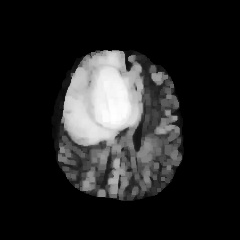

In [28]:
img_path = '/content/drive/MyDrive/Brain_Tumor_Classification/input/Final_Tumor_Dataset/Train/yes/Image1006.jpg'
img = Image.open(img_path)
img

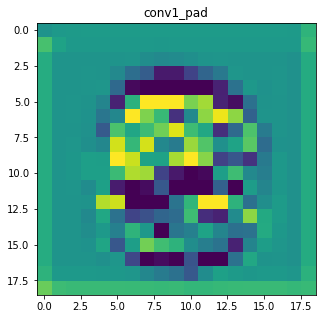

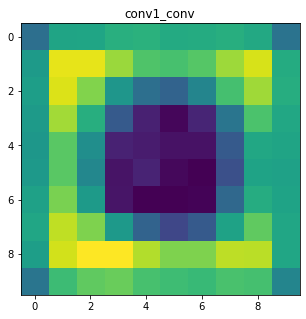

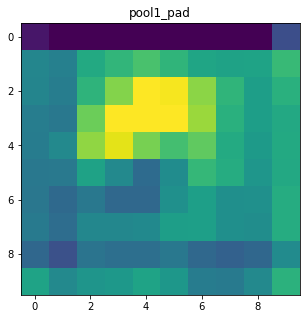

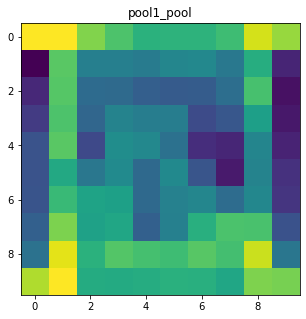

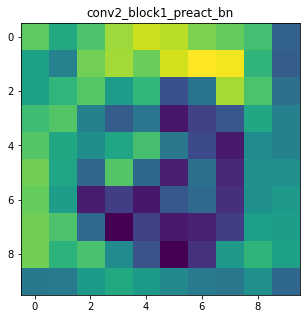

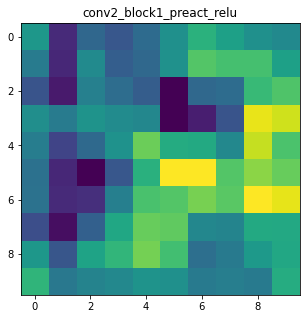

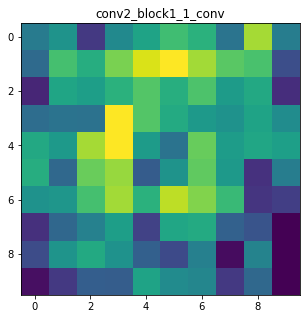

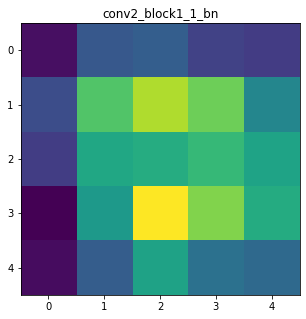

In [30]:
successive_outputs = [layer.output for layer in selected_conv_layers]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


img = load_img(img_path, target_size=(150,150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = 1  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    i = random.randint(0, feature_map.shape[-1])
    # Postprocess the feature to make it visually palatable
    x = feature_map[0, :, :, i]
    x -= x.mean()
    x /= x.std()
    x *= 64
    x += 128
    x = np.clip(x, 0, 255).astype('uint8')
    # We'll tile each filter into this big horizontal grid
    display_grid[:, 0 : size] = x
  # Display the grid
    scale = 5. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


# Conclusion
In the initial layers of the ResNet model, we can decipher what the layers are learning but as we see for the later layers of the model, the dimensions of the outputs are reduced as Convolutional layers half the dimensions and so the outputs tend to be in an encoded format and so hard to interpret.